In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
df = pd.read_csv('Data/Data.csv')

df.sample(5)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
777,29.9,37.0,19.5,1008.3,39.0,2.7,4.4,9.4,23.208333
551,15.5,24.1,7.7,1021.0,71.0,1.1,3.5,11.1,219.720833
59,29.9,38.5,24.3,1008.3,53.0,1.9,6.7,22.2,79.916667
992,37.6,43.0,28.7,1001.2,42.0,2.4,2.8,11.1,67.083333
540,19.2,26.9,11.6,1015.4,78.0,1.0,4.8,14.8,302.458333


In [3]:
print("df.shape : ", df.shape)

df.shape :  (1093, 9)


**1093 enteries with 8 features, 1 target value (PM2.5)**

In [4]:
print(df.columns)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


- **T**  	  Average Temperature (°C)            
- **TM**	  Maximum temperature (°C)             
- **Tm**	  Minimum temperature (°C)                 
- **SLP**	  Atmospheric pressure at sea level (hPa)          
- **H**	  Average relative humidity (%)           
- **PP**	  Total rainfall and / or snowmelt (mm)          
- **VV**    Average visibility (Km)           
- **V**	  Average wind speed (Km/h)               
- **VM**    Maximum sustained wind speed (Km/h)            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
T         1093 non-null float64
TM        1093 non-null float64
Tm        1093 non-null float64
SLP       1093 non-null float64
H         1093 non-null float64
VV        1093 non-null float64
V         1093 non-null float64
VM        1093 non-null float64
PM 2.5    1092 non-null float64
dtypes: float64(9)
memory usage: 77.0 KB


PM2.5 has only one missing value :

In [6]:
df[df['PM 2.5'].isnull()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


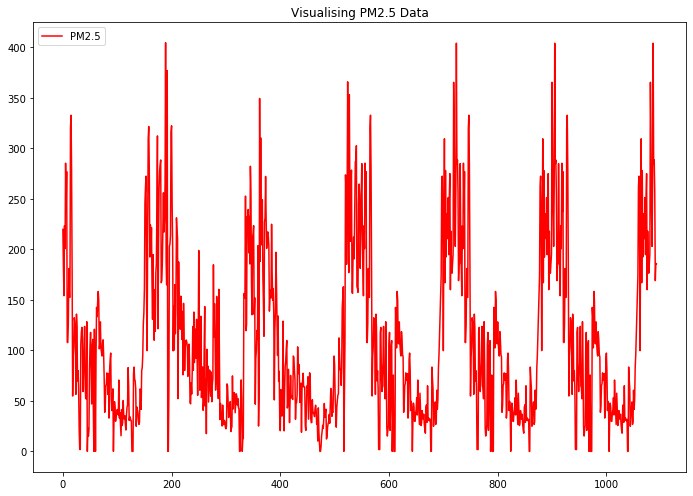

In [7]:
# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="red", label="PM2.5")
plt.title('Visualising PM2.5 Data')
plt.show()

**There seems to be some repetiotions in the dataset after index 700, so lets check for duplicates in the dataset and remove them if any**

In [8]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
         T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
731   16.9  25.1   6.6  1021.3  65.0  1.1   2.0   7.6  284.795833
732   15.5  24.1   7.7  1021.0  71.0  1.1   3.5  11.1  219.720833
733   14.9  22.8   8.0  1018.4  73.0  1.1   5.9  13.0  182.187500
734   18.3  24.7  11.5  1018.1  85.0  0.5   1.1   7.6  154.037500
735   16.5  24.7  12.0  1017.4  82.0  0.6   8.0  13.0  223.208333
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[362 rows x 9 columns]


**So, yeah, there were 362 duplicate enteries in the dataset !**          
I'll remove them from the dataset

In [9]:
df = df[df.duplicated() == False]

print(df.shape)

(731, 9)


In [10]:
df.fillna(method='ffill', inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 9 columns):
T         731 non-null float64
TM        731 non-null float64
Tm        731 non-null float64
SLP       731 non-null float64
H         731 non-null float64
VV        731 non-null float64
V         731 non-null float64
VM        731 non-null float64
PM 2.5    731 non-null float64
dtypes: float64(9)
memory usage: 57.1 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
T,731.0,25.556908,7.286760,6.7,18.850000,27.700000,31.2000,38.5
TM,731.0,32.231874,6.852548,9.8,27.550000,34.100000,36.9000,45.5
Tm,731.0,19.273598,7.454202,0.0,12.000000,21.000000,25.9000,32.7
SLP,731.0,1008.196854,7.564601,991.5,1001.300000,1008.500000,1015.0000,1023.2
H,731.0,64.134063,15.460460,20.0,55.000000,66.000000,75.0000,98.0
VV,731.0,1.891929,0.686446,0.3,1.400000,1.900000,2.4000,5.8
V,731.0,6.630369,3.967064,0.4,3.500000,6.300000,9.1000,24.4
VM,731.0,15.696580,7.654019,1.9,11.100000,14.800000,18.3000,57.6
PM 2.5,731.0,108.036007,82.570588,0.0,43.583333,81.833333,154.0375,404.5


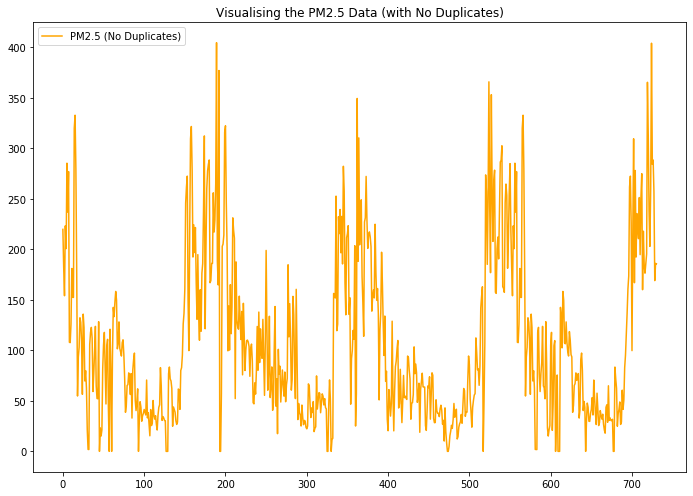

In [13]:
# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="orange", label="PM2.5 (No Duplicates)")
plt.title('Visualising the PM2.5 Data (with No Duplicates)')
plt.show()